Perform the following operations using Python by creating student performance dataset.

    1 Display Missing Values
    2 Replace missing values using any 2 suitable methods
    3 Identify outliers using boxplot and scatterplot
    4 Handle outlier using any technique
    5 Perform any 2 data normalization techniqueique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

miss = [0]
df = pd.read_csv('academicperformance.csv', na_values = miss)
df.isna().sum()

Roll       0
Name       0
Femarks    6
SEMarks    7
Temarks    1
Bemarks    2
dtype: int64

In [2]:
fe = df['Femarks'].isna()
df[fe]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
5,6,Avhad Pushkaraj Laxmikant,NaN,8.0,7.91,7.84
39,40,Mahale Shreya Sanjay,NaN,NaN,9.86,9.91
40,41,More Siddhi Sudhir,NaN,NaN,9.59,9.59
45,46,Patel Jaid Aslam,NaN,NaN,8.50,9.14
49,50,Patil Om Nitin,NaN,NaN,8.30,8.50
59,60,Ravte Rohit Ukhardya,NaN,NaN,5.00,9.36


In [3]:
te = df['Temarks'].isna()
df[te]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
18,19,Deore Atharva Mohan,6.25,6.89,NaN,7.2


In [4]:
# tech 1
df_drop = df
df_drop.isna().sum()

constant = 1.00
df_drop = df.fillna(constant)
df_drop.isna().sum()
# null
df_drop.tail()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
55,56,Pawar Manish Sahebrao,8.55,8.64,9.73,9.80
56,57,Phadol Purva Gorakh,7.27,7.83,9.55,9.13
57,58,Rabade Vishal Chandrasing,9.54,10.00,9.45,9.54
58,59,Ratnaparkhi Raj Ashok,8.59,1.00,9.63,9.56
59,60,Ravte Rohit Ukhardya,1.00,1.00,5.00,9.36


In [5]:
# tech 2
df_mean = df
df_mean['Femarks'] = df_mean['Femarks'].fillna(df['Femarks'].mean())
df_mean.tail()

df_mean['SEMarks'] = df_mean['SEMarks'].fillna(df['SEMarks'].median())
df_mean.tail()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
55,56,Pawar Manish Sahebrao,8.550000,8.64,9.73,9.80
56,57,Phadol Purva Gorakh,7.270000,7.83,9.55,9.13
57,58,Rabade Vishal Chandrasing,9.540000,10.00,9.45,9.54
58,59,Ratnaparkhi Raj Ashok,8.590000,8.64,9.63,9.56
59,60,Ravte Rohit Ukhardya,9.679074,8.64,5.00,9.36


In [6]:
# outlier using box and scatter plot
df.columns

Index(['Roll', 'Name', 'Femarks', 'SEMarks', 'Temarks', 'Bemarks'], dtype='object')

<Axes: >

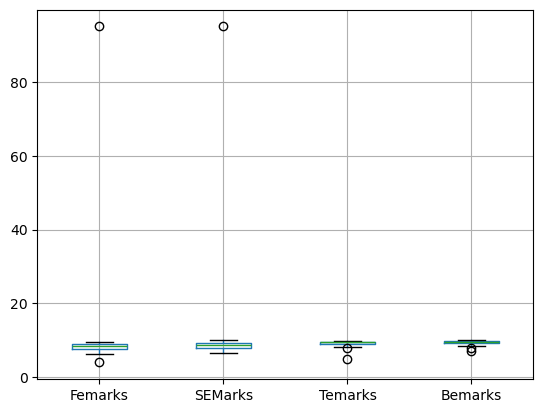

In [7]:
num_cols = ['Femarks', 'SEMarks', 'Temarks', 'Bemarks']
df.boxplot(num_cols)

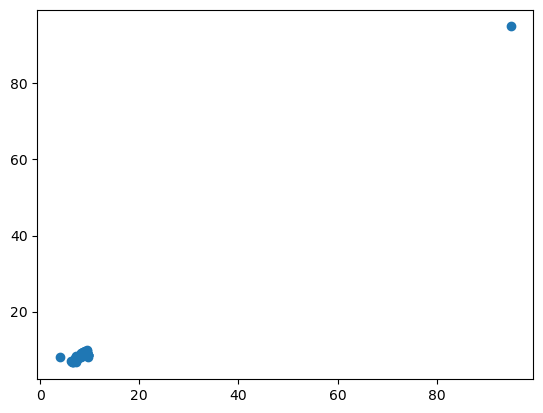

In [8]:
plt.scatter(df['Femarks'], df['SEMarks'])

In [40]:
handle_out = df.dropna()
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1
outliers = []
low_bound = q1 - 1.5 * iqr
high_bound = q3 + 1.6 * iqr
outliers = ((df[num_cols] < low_bound) | (df[num_cols] > high_bound))
outliers_df = df[outliers.any(axis=1)]

no_out = df
no_out = no_out.drop(outliers.index)
no_out
# df_no_outliers = df[~outliers.any(axis=1)]
# df_no_outliers = df_no_outliers.drop(59)
# # df_no_outliers.boxplot(num_cols)
# outliers_df

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
0,1,Aage Raksha Gajanan,8.400000,8.60,9.80,9.90
1,2,Ahire Anuja Sanjay,8.140000,8.14,9.32,9.82
2,3,Ajare Ashiya Nasaruddin,6.610000,6.61,9.14,9.14
3,4,Amrutkar Roshani Suresh,7.200000,7.30,8.90,NaN
4,5,Attarde Komal Bhagwan,7.050000,7.45,9.05,9.40
6,7,Aware Priti Balkrushna,8.270000,8.50,9.68,9.14
7,8,Barse Rutuja Kiran,8.680000,9.00,9.59,9.66
8,9,Baviskar Pratham Pravin,7.640000,7.64,9.18,9.39
9,10,Bhalerao Tejal Pradip,9.090000,9.36,9.91,9.95
10,11,Borse Sharvari Rajesh,7.450000,7.91,9.41,9.41


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
newdf = df.copy()
newdf[num_cols] = scaler.fit_transform(newdf[num_cols])
newdf

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
0,1,Aage Raksha Gajanan,0.048352,0.022735,0.977597,0.964286
1,2,Ahire Anuja Sanjay,0.045495,0.017532,0.879837,0.935714
2,3,Ajare Ashiya Nasaruddin,0.028681,0.000226,0.843177,0.692857
3,4,Amrutkar Roshani Suresh,0.035165,0.008031,0.794297,NaN
4,5,Attarde Komal Bhagwan,0.033516,0.009727,0.824847,0.785714
5,6,Avhad Pushkaraj Laxmikant,0.062407,0.015948,0.592668,0.228571
6,7,Aware Priti Balkrushna,0.046923,0.021604,0.953157,0.692857
7,8,Barse Rutuja Kiran,0.051429,0.027259,0.934827,0.878571
8,9,Baviskar Pratham Pravin,0.040000,0.011876,0.851324,0.782143
9,10,Bhalerao Tejal Pradip,0.055934,0.031331,1.000000,0.982143


In [48]:
# decimal scaling
def decimal_scale(col):
    max = np.max(np.abs(col))
    numdigit = len(str(int(max)))
    scale = 10**numdigit
    return col / scale

dec_data = df.copy()
dec_data[num_cols] = dec_data[num_cols].apply(decimal_scale)
dec_data

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
0,1,Aage Raksha Gajanan,0.084000,0.0860,0.980,0.0990
1,2,Ahire Anuja Sanjay,0.081400,0.0814,0.932,0.0982
2,3,Ajare Ashiya Nasaruddin,0.066100,0.0661,0.914,0.0914
3,4,Amrutkar Roshani Suresh,0.072000,0.0730,0.890,NaN
4,5,Attarde Komal Bhagwan,0.070500,0.0745,0.905,0.0940
5,6,Avhad Pushkaraj Laxmikant,0.096791,0.0800,0.791,0.0784
6,7,Aware Priti Balkrushna,0.082700,0.0850,0.968,0.0914
7,8,Barse Rutuja Kiran,0.086800,0.0900,0.959,0.0966
8,9,Baviskar Pratham Pravin,0.076400,0.0764,0.918,0.0939
9,10,Bhalerao Tejal Pradip,0.090900,0.0936,0.991,0.0995
